In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784')

mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [3]:
X, y =mnist["data"], mnist["target"]

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

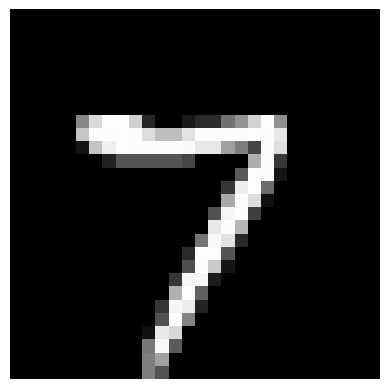

In [8]:
some_digit = X.iloc[40222]
some_digit_image = some_digit.values.reshape(28, 28)
plt.imshow(some_digit_image, cmap='gray')
plt.axis('off')
plt.show()

In [9]:
y[40222]

'7'

In [18]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

ValueError: The number of classes has to be greater than one; got 1 class

In [11]:
def plot_digits(instances, images_per_row, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap='binary', **options)
    plt.axis('off')

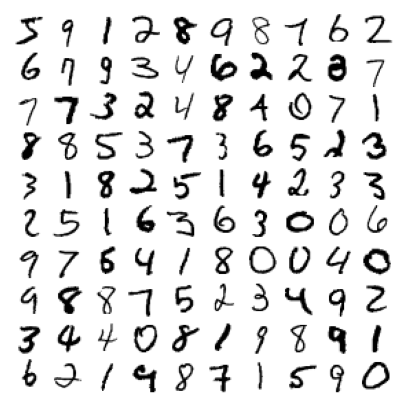

In [12]:
plt.figure(figsize=(5, 5))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [13]:
#Spliting the datatset into training and testing sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
#Shuffling the training set to ensure that all cross-validation folds will be similar.
#We do not want one fold to be missing some digits
shuffle_index = np.random.permutation(60000)
X_train = X_train.iloc[shuffle_index]
y_train = y_train.iloc[shuffle_index]

## Binary Classifier

In [16]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [20]:
from sklearn.linear_model import SGDClassifier

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

sgd_clf = SGDClassifier(max_iter=5, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

ValueError: The number of classes has to be greater than one; got 1 class

In [16]:
sgd_clf.predict(X_train[15:20])

array(['2', '7', '1', '4', '7'], dtype='<U1')

In [17]:
y_train[15:20]

54768    2
23220    7
59768    1
30954    4
16299    7
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [18]:
y_pred = sgd_clf.predict(X_test[20:25])

In [19]:
y_test[20:25]

60020    9
60021    6
60022    6
60023    5
60024    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [20]:
accuracy = accuracy_score(y_test[20:25], y_pred)

#print("Accuracy:", accuracy)
accuracy

1.0

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

In [24]:
for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd_clf)
    
    
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train[train_index]
    X_test_folds = X_train.iloc[test_index]
    y_test_folds = y_train[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))

0.0993
0.1015
0.10485


In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8726 , 0.86495, 0.877  ])

In [26]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_train, y_train_pred)

array([[5720,    0,   46,   15,    8,   47,   26,    2,   50,    9],
       [   3, 6476,   92,   36,   12,   37,    3,   15,   48,   20],
       [  53,   35, 5379,  119,   53,   46,   45,   59,  132,   37],
       [  29,   16,  313, 5094,   16,  307,   11,   51,  167,  127],
       [  24,   29,   76,   34, 5235,   54,   30,   12,   48,  300],
       [  90,   18,   87,  267,   76, 4428,   48,   17,  272,  118],
       [  75,   19,  260,   21,   86,  193, 5178,    1,   80,    5],
       [  35,   17,  121,   76,   97,   29,    8, 5385,   28,  469],
       [  64,   79,  368,  169,   58,  510,   21,   15, 4277,  290],
       [  37,   22,   39,  127,  262,  104,    4,  169,   66, 5119]],
      dtype=int64)